# Chemical properties of wine and their associated quality readings
    
### #1 Data overview:    
        - [dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality);
        - analyse alcohol content, acidity level and residual sugar;
    
### #2 Asking questions:        
        - What chemical characteristics are most important in predicting the quality of wine?
        - Is a certain type of wine (red or white) associated with higher quality?
        - Do wines with higher alcoholic content receive better ratings?
        - Do sweeter wines (more residual sugar) receive better ratings?
        - What level of acidity is associated with the highest quality?
    
### #3Gathering data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
% matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

red_df = pd.read_csv('winequality-red.csv', sep=';')
white_df = pd.read_csv('winequality-white.csv', sep=';')

print(red_df.shape)
red_df.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
print(white_df.shape)
white_df.head(20)

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


### #4 Assessing Data:
    - How many samples of red wine are there?
    - How many columns are in each dataset?
    - Which features have missing values?
    - How many duplicate rows are in the white wine dataset?
    - Are duplicate rows in these datasets significant/ need to be dropped? Not necessarily
    - How many unique values of quality are in the red/white wine dataset?
    - What is the mean density in the red/white wine dataset?

In [4]:
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 149.9 KB


In [5]:
white_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.2 KB


In [6]:
# How many duplicate rows are in the white wine dataset?
print(sum(red_df.duplicated()))
print(sum(white_df.duplicated()))

240
937


In [7]:
#df[df_red.duplicated()]

In [8]:
print(red_df.isnull().sum())
print(white_df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [9]:
red_df.quality.nunique()

6

In [10]:
white_df['quality'].nunique()

7

In [11]:
red_df['density'].mean()

0.996746679174484

In [12]:
white_df['density'].mean()

0.9940273764801959

### #5. Appending and NumPy
    - why numpy is fast

In [13]:
a = np.random.random(int(1e8))

In [14]:
start = time.time()
sum(a) /len(a)
print(time.time() - start, 'seconds')

10.357800245285034 seconds


In [15]:
start = time.time()
np.mean(a)
print(time.time() - start, 'seconds')

0.10599994659423828 seconds


### #6. Appending Data 

### Create Color Columns

Create two arrays as long as the number of rows in the red and white dataframes that repeat the value “red” or “white.” NumPy offers really easy way to do this. Here’s the documentation for [NumPy’s repeat](https://docs.scipy.org/doc/numpy/reference/generated/numpy.repeat.html) function. Take a look and try it yourself.

In [16]:
# create color array for red dataframe
color_red = np.repeat('red', red_df.shape[0])

# create color array for white dataframe
color_white = np.repeat('white', white_df.shape[0])

Add arrays to the red and white dataframes. Do this by setting a new column called 'color' to the appropriate array. The cell below does this for the red dataframe.

### #7. Renaming Columns

In [17]:
new_labels = list(red_df.columns)
new_labels

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [18]:
new_labels[6] = 'total_sulfur_dioxide'
new_labels

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [19]:
list(white_df.columns)
new_labels[6] = 'total_sulfur_dioxide'
new_labels

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [20]:
# rename a column
#red_df = red_df.rename(index=str, columns={'total_sulfur-dioxide':'total_sulfur_dioxide'})

In [21]:
red_df['color'] = color_red
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [22]:
white_df['color'] = color_white
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


### Combine DataFrames with Append
Check the documentation for [Pandas' append](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.append.html) function and see if you can use this to figure out how to combine the dataframes. (Bonus: Why aren't we using the [merge](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) method to combine the dataframes?) If you don’t get it, I’ll show you how afterwards. Make sure to save your work in this notebook! You'll come back to this later.

In [23]:
# append dataframes
wine_df = pd.concat([red_df, white_df])

# view dataframe to check for success
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [24]:
# How many rows are in the combined dataframe?
wine_df.shape

(6497, 13)

### Combine DataFrames with Append
Check the documentation for [Pandas' append](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.append.html) function and see if you can use this to figure out how to combine the dataframes. (Bonus: Why aren't we using the [merge](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) method to combine the dataframes?) If you don’t get it, I’ll show you how afterwards. Make sure to save your work in this notebook! You'll come back to this later.

### Save Combined Dataset
Save your newly combined dataframe as `winequality_edited.csv`. Remember, set `index=False` to avoid saving with an unnamed column!

In [25]:
#save
wine_df.to_csv('winequality_edited.csv',index=False)

### #7. Exploring with visuals
### EDA with Visuals

### Histograms for Various Features

- Skewed to the right: fixed acidity, alcohol

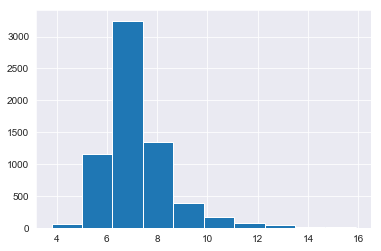

In [26]:
wine_df['fixed acidity'].hist();

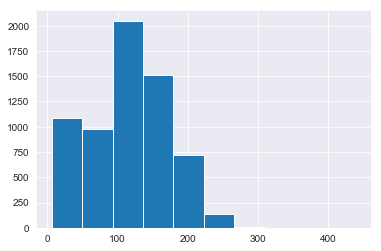

In [27]:
wine_df['total sulfur dioxide'].hist();

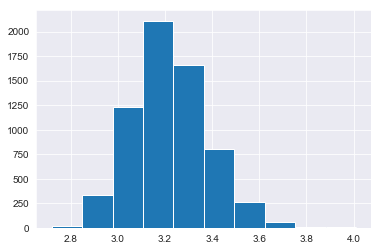

In [28]:
wine_df['pH'].hist();

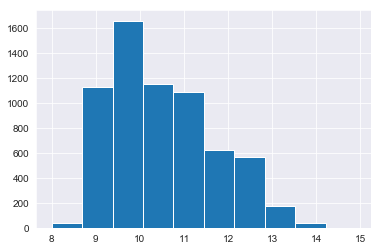

In [29]:
wine_df.alcohol.hist();

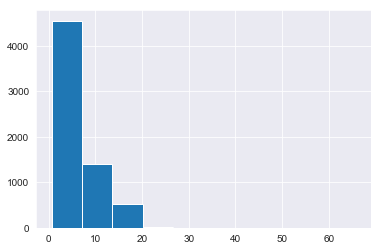

In [30]:
wine_df['residual sugar'].hist();

### Scatterplots of Quality Against Various Features
- alcohol is most likeli to have a positive impact on quality

In [31]:
#pd.plotting.scatter_matrix(wine_df, figsize=(15,15));

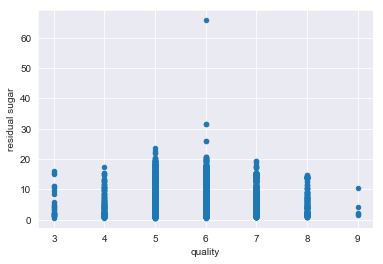

In [32]:
wine_df.plot(x='quality', y='residual sugar', kind='scatter');

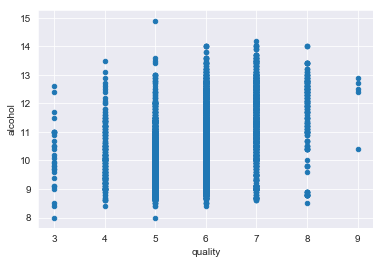

In [33]:
wine_df.plot(x='quality', y='alcohol', kind='scatter');

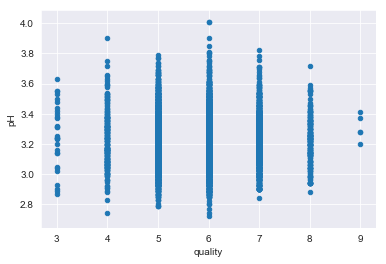

In [34]:
wine_df.plot(x='quality', y='pH', kind='scatter');

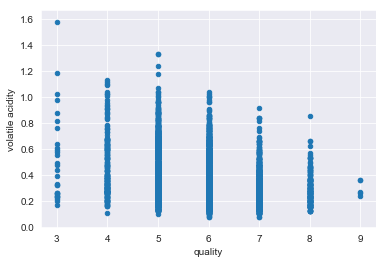

In [35]:
wine_df.plot(x='quality', y='volatile acidity', kind='scatter');

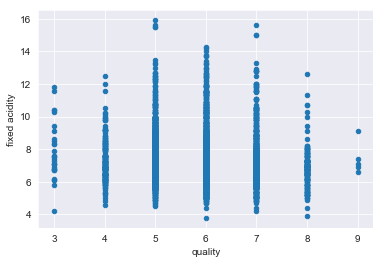

In [36]:
wine_df.plot(x='quality', y='fixed acidity', kind='scatter');

### #8. Pandas Groupby
- [pandas Groupby](https://pandas.pydata.org/pandas-docs/stable/groupby.html)
- [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)

In [37]:
wine_df.mean()

fixed acidity             7.215307
volatile acidity          0.339666
citric acid               0.318633
residual sugar            5.443235
chlorides                 0.056034
free sulfur dioxide      30.525319
total sulfur dioxide    115.744574
density                   0.994697
pH                        3.218501
sulphates                 0.531268
alcohol                  10.491801
quality                   5.818378
dtype: float64

In [38]:
# the mean pH level for quality rating od 7
wine_df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.853333,0.517000,0.281000,5.140000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000
4,7.288889,0.457963,0.272315,4.153704,0.060056,20.636574,103.432870,0.994833,3.231620,0.505648,10.180093
5,7.326801,0.389614,0.307722,5.804116,0.064666,30.237371,120.839102,0.995849,3.212189,0.526403,9.837783
6,7.177257,0.313863,0.323583,5.549753,0.054157,31.165021,115.410790,0.994558,3.217726,0.532549,10.587553
7,7.128962,0.288800,0.334764,4.731696,0.045272,30.422150,108.498610,0.993126,3.228072,0.547025,11.386006
8,6.835233,0.291010,0.332539,5.382902,0.041124,34.533679,117.518135,0.992514,3.223212,0.512487,11.678756
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


In [39]:
wine_df.groupby(['quality', 'color']).mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality color                                                                 
3       red         8.360000          0.884500     0.171000        2.635000   
        white       7.600000          0.333250     0.336000        6.392500   
4       red         7.779245          0.693962     0.174151        2.694340   
        white       7.129448          0.381227     0.304233        4.628221   
5       red         8.167254          0.577041     0.243686        2.528855   
        white       6.933974          0.302011     0.337653        7.334969   
6       red         8.347179          0.497484     0.273824        2.477194   
        white       6.837671          0.260564     0.338025        6.441606   
7       red         8.872362          0.403920     0.375176        2.720603   
        white       6.734716          0.262767     0.325625        5.186477   
8       red         8.566667          0.423333     0.391111        2.577778   
        white       6.657143          0.277400     0.326514        5.671429   
9       white       7.420000          0.298000     0.386000        4.120000   

               chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality color                                                                   
3       red     0.122500            11.000000             24.900000  0.997464   
        white   0.054300            53.325000            170.600000  0.994884   
4       red     0.090679            12.264151             36.245283  0.996542   
        white   0.050098            23.358896            125.279141  0.994277   
5       red     0.092736            16.983847             56.513950  0.997104   
        white   0.051546            36.432052            150.904598  0.995263   
6       red     0.084956            15.711599             40.869906  0.996615   
        white   0.045217            35.650591            137.047316  0.993961   
7       red     0.076588            14.045226             35.020101  0.996104   
        white   0.038191            34.125568            125.114773  0.992452   
8       red     0.068444            13.277778             33.444444  0.995212   
        white   0.038314            36.720000            126.165714  0.992236   
9       white   0.027400            33.400000            116.000000  0.991460   

                     pH  sulphates    alcohol  
quality color                                  
3       red    3.398000   0.570000   9.955000  
        white  3.187500   0.474500  10.345000  
4       red    3.381509   0.596415  10.265094  
        white  3.182883   0.476135  10.152454  
5       red    3.304949   0.620969   9.899706  
        white  3.168833   0.482203   9.808840  
6       red    3.318072   0.675329  10.629519  
        white  3.188599   0.491106  10.575372  
7       red    3.290754   0.741256  11.465913  
        white  3.213898   0.503102  11.367936  
8       red    3.267222   0.767778  12.094444  
        white  3.218686   0.486229  11.636000  
9       white  3.308000   0.466000  12.180000

In [40]:
wine_df.groupby(['quality', 'color'], as_index=False).mean()

,quality,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,3,red,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
1,3,white,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
2,4,red,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
3,4,white,7.129448,0.381227,0.304233,4.628221,0.050098,23.358896,125.279141,0.994277,3.182883,0.476135,10.152454
4,5,red,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
5,5,white,6.933974,0.302011,0.337653,7.334969,0.051546,36.432052,150.904598,0.995263,3.168833,0.482203,9.808840
6,6,red,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,6,white,6.837671,0.260564,0.338025,6.441606,0.045217,35.650591,137.047316,0.993961,3.188599,0.491106,10.575372
8,7,red,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
9,7,white,6.734716,0.262767,0.325625,5.186477,0.038191,34.125568,125.114773,0.992452,3.213898,0.503102,11.367936


In [41]:
wine_df.groupby(['quality', 'color'], as_index=False)['pH'].mean()

,quality,color,pH
0,3,red,3.398000
1,3,white,3.187500
2,4,red,3.381509
3,4,white,3.182883
4,5,red,3.304949
5,5,white,3.168833
6,6,red,3.318072
7,6,white,3.188599
8,7,red,3.290754
9,7,white,3.213898


### #9. Drawing Conclusions Using Groupby

In the notebook below, you're going to investigate two questions about this data using pandas' [groupby](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) function. Here are tips for answering each question:

Q1: Is a certain type of wine (red or white) associated with higher quality?
For this question, compare the average quality of red wine with the average quality of white wine with groupby. To do this group by color and then find the mean quality of each group.

**Answer:** The mean quality of red wine is less than of white wine.

Q2: What level of acidity (pH value) receives the highest average rating?
This question is more tricky because unlike color, which has clear categories you can group by (red and white) pH is a quantitative variable without clear categories. However, there is a simple fix to this. You can create a categorical variable from a quantitative variable by creating your own categories. [pandas' cut](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html) function let's you "cut" data in groups. Using this, create a new column called acidity_levels with these categories:

Acidity Levels:
- High: Lowest 25% of pH values
- Moderately High: 25% - 50% of pH values
- Medium: 50% - 75% of pH values
- Low: 75% - max pH value

Here, the data is being split at the 25th, 50th, and 75th percentile. Remember, you can get these numbers with pandas' describe()! After you create these four categories, you'll be able to use groupby to get the mean quality rating for each acidity level.

**Answer**: Low

### Is a certain type of wine associated with higher quality?

In [42]:
# Find the mean quality of each wine type (red and white) with groupby
wine_df.groupby('color')['quality'].mean()

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

### What level of acidity receives the highest average rating?

In [43]:
# View the min, 25%, 50%, 75%, max pH values with Pandas describe
wine_df.describe().pH

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [44]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [2.72, 3.11, 3.21, 3.32, 4.01] # Fill in this list with five values you just found

In [45]:
# Labels for the four acidity level groups
bin_names = ['high', 'mod_high', 'medium', 'low']

In [46]:
# Creates acidity_levels column
wine_df['acidity_levels'] = pd.cut(wine_df['pH'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,mod_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,mod_high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [47]:
# Find the mean quality of each acidity level with groupby
wine_df.groupby('acidity_levels').mean().quality

acidity_levels
high        5.783343
mod_high    5.784540
medium      5.850832
low         5.859593
Name: quality, dtype: float64

In [48]:
# Save changes for the next section
wine_df.to_csv('winequality_edited.csv', index=False)

### #10. [Pandas Query](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.query.html)

```# selecting malignant records in cancer data
df_m = df[df['diagnosis'] == 'M']
df_m = df.query('diagnosis == "M"')```

```# selecting records of people making over $50K
df_a = df[df['income'] == ' >50K']
df_a = df.query('income == " >50K"')```

The examples above filtered columns containing strings. You can also use query to filter columns containing numeric data like this.

```# selecting records in cancer data with radius greater than the median
df_h = df[df['radius'] > 13.375]
df_h = df.query('radius > 13.375')```

### Drawing Conclusions Using Query
In the notebook below, you're going to investigate two questions about this data using pandas' query function. Here are tips for answering each question:

Q1: Do wines with higher alcoholic content receive better ratings?
To answer this question, use query to create two groups of wine samples:

- Low alcohol (samples with an alcohol content less than the median)
- High alcohol (samples with an alcohol content greater than or equal to the median)
- Then, find the mean quality rating of each group.

**Answer:** Yes 

Q2: Do sweeter wines (more residual sugar) receive better ratings?
Similarly, use the median to split the samples into two groups by residual sugar and find the mean quality rating of each group.

**Answer:** Yes

### Do wines with higher alcoholic content receive better ratings?

In [49]:
# get the median amount of alcohol content
wine_df.alcohol.median()

10.3

In [50]:
# select samples with alcohol content less than the median
# low_alcohol = wine_df[wine_df.alcohol < 10.3]
low_alcohol = wine_df.query('alcohol < 10.3')

# select samples with alcohol content greater than or equal to the median
# high_alcohol = wine_df[wine_df.alcohol >= wine_df.alcohol.meadian()]
high_alcohol = wine_df.query('alcohol >= 10.3')

# ensure these queries included each sample exactly once
num_samples = wine_df.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count() # should be True

True

In [51]:
# get mean quality rating for the low alcohol and high alcohol groups
low_alcohol.quality.mean(), high_alcohol.quality.mean()

(5.475920679886686, 6.146084337349397)

### Do sweeter wines receive better ratings?

In [52]:
# get the median amount of residual sugar
wine_df['residual sugar'].median()

3.0

In [53]:
# select samples with residual sugar less than the median
low_sugar = wine_df[wine_df['residual sugar'] < 3]

# select samples with residual sugar greater than or equal to the median
high_sugar = wine_df[wine_df['residual sugar'] >= 3]

# ensure these queries included each sample exactly once
num_samples == low_sugar['quality'].count() + high_sugar['quality'].count() # should be True

True

In [54]:
# get mean quality rating for the low sugar and high sugar groups
low_sugar.quality.mean(), high_sugar.quality.mean()

(5.808800743724822, 5.82782874617737)

In [55]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,mod_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,mod_high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


### #11. Type & Quality Plot
- Visualizations regarding the associations between wine quality and different properties of wine
- [seaborn](https://seaborn.pydata.org/) - [examples](https://seaborn.pydata.org/examples/index.html)

Q1: Understand if a certain type of wine is asspciated with higher quality

**Answer:** White wine samples has slightl higher average quality ratings. (from the bar chart)

In [56]:
wine_df.groupby('color')['quality'].mean()

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

Text(0,0.5,'Quality')

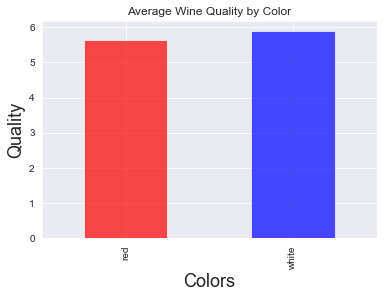

In [57]:
colors = ['red', 'blue']
color_means = wine_df.groupby('color')['quality'].mean()
color_means.plot(kind='bar', title='Average Wine Quality by Color', color=colors, alpha=.7);
plt.xlabel('Colors', fontsize=18)
plt.ylabel('Quality', fontsize=18)

Plot a more detailed bar chart

In [58]:
counts = wine_df.groupby(['quality', 'color']).count()
counts
## values are the same -> pick an arbitrary one

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality color                                                                 
3       red               10                10           10              10   
        white             20                20           20              20   
4       red               53                53           53              53   
        white            163               163          163             163   
5       red              681               681          681             681   
        white           1457              1457         1457            1457   
6       red              638               638          638             638   
        white           2198              2198         2198            2198   
7       red              199               199          199             199   
        white            880               880          880             880   
8       red               18                18           18              18   
        white            175               175          175             175   
9       white              5                 5            5               5   

               chlorides  free sulfur dioxide  total sulfur dioxide  density  \
quality color                                                                  
3       red           10                   10                    10       10   
        white         20                   20                    20       20   
4       red           53                   53                    53       53   
        white        163                  163                   163      163   
5       red          681                  681                   681      681   
        white       1457                 1457                  1457     1457   
6       red          638                  638                   638      638   
        white       2198                 2198                  2198     2198   
7       red          199                  199                   199      199   
        white        880                  880                   880      880   
8       red           18                   18                    18       18   
        white        175                  175                   175      175   
9       white          5                    5                     5        5   

                 pH  sulphates  alcohol  acidity_levels  
quality color                                            
3       red      10         10       10              10  
        white    20         20       20              20  
4       red      53         53       53              53  
        white   163        163      163             163  
5       red     681        681      681             681  
        white  1457       1457     1457            1457  
6       red     638        638      638             638  
        white  2198       2198     2198            2197  
7       red     199        199      199             199  
        white   880        880      880             880  
8       red      18         18       18              18  
        white   175        175      175             175  
9       white     5          5        5               5

Text(0,0.5,'Count')

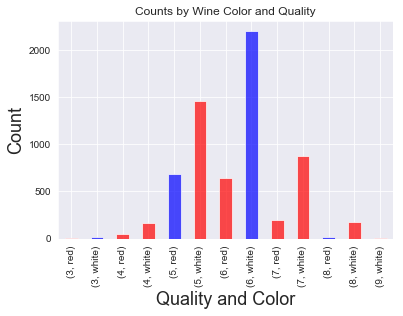

In [59]:
counts = wine_df.groupby(['quality', 'color']).count()['pH']
counts.plot(kind='bar', title='Counts by Wine Color and Quality', color=colors, alpha=.7)
plt.xlabel('Quality and Color', fontsize=18)
plt.ylabel('Count', fontsize=18)

Text(0,0.5,'Porportion')

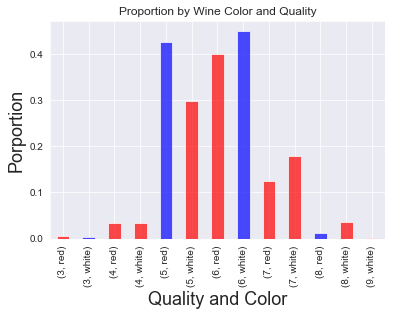

In [60]:
# use proportion instead
totals = wine_df.groupby(['color']).count()['pH']
proportions = counts/totals
proportions.plot(kind='bar', title='Proportion by Wine Color and Quality', color=colors, alpha=.7)
plt.xlabel('Quality and Color', fontsize=18)
plt.ylabel('Porportion', fontsize=18)

- for the lower ratings: three, fours and five red samples show hiher proportions
- for the highr ratings: six, seven eight and nine, white samples have higher proportions

### #12. Matplotlib example

Before we jump into the making of this plot, let's walk through a simple example using Matplotlib to create a bar chart. We can use pyplot's [bar](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar) function for this.


In [61]:
## counts for each quality rating by color
counts = wine_df.groupby(['quality', 'color']).count()
counts

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality color                                                                 
3       red               10                10           10              10   
        white             20                20           20              20   
4       red               53                53           53              53   
        white            163               163          163             163   
5       red              681               681          681             681   
        white           1457              1457         1457            1457   
6       red              638               638          638             638   
        white           2198              2198         2198            2198   
7       red              199               199          199             199   
        white            880               880          880             880   
8       red               18                18           18              18   
        white            175               175          175             175   
9       white              5                 5            5               5   

               chlorides  free sulfur dioxide  total sulfur dioxide  density  \
quality color                                                                  
3       red           10                   10                    10       10   
        white         20                   20                    20       20   
4       red           53                   53                    53       53   
        white        163                  163                   163      163   
5       red          681                  681                   681      681   
        white       1457                 1457                  1457     1457   
6       red          638                  638                   638      638   
        white       2198                 2198                  2198     2198   
7       red          199                  199                   199      199   
        white        880                  880                   880      880   
8       red           18                   18                    18       18   
        white        175                  175                   175      175   
9       white          5                    5                     5        5   

                 pH  sulphates  alcohol  acidity_levels  
quality color                                            
3       red      10         10       10              10  
        white    20         20       20              20  
4       red      53         53       53              53  
        white   163        163      163             163  
5       red     681        681      681             681  
        white  1457       1457     1457            1457  
6       red     638        638      638             638  
        white  2198       2198     2198            2197  
7       red     199        199      199             199  
        white   880        880      880             880  
8       red      18         18       18              18  
        white   175        175      175             175  
9       white     5          5        5               5

### Creating a Bar Chart Using Matplotlib

There are two required arguments in pyplot's bar function: the x-coordinates of the bars, and the heights of the bars.

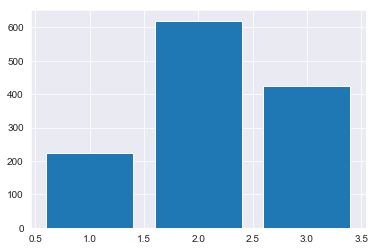

In [62]:
plt.bar([1, 2, 3], [224, 620, 425]);

You can specify the x tick labels using pyplot's `xticks` function, or by specifying another parameter in the `bar` function. The two cells below accomplish the same thing.

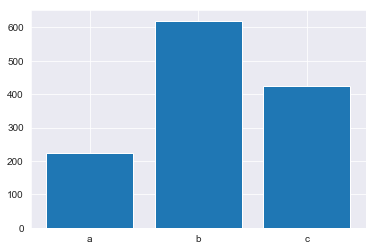

In [63]:
# plot bars with x tick labels
plt.bar([1, 2, 3], [224, 620, 425], tick_label=['a', 'b', 'c']);

Set the title and label axes like this.

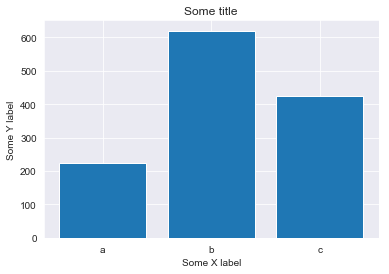

In [64]:
plt.bar([1, 2, 3], [224, 620, 425], tick_label=['a', 'b', 'c']);
plt.title('Some title')
plt.xlabel('Some X label')
plt.ylabel('Some Y label');

### #13. Plotting with Matplotlib
Use Matplotlib to create bar charts that visualize the conclusions you made with groupby and query.

In [65]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,mod_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,mod_high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


### #1: Do wines with higher alcoholic content receive better ratings?
Create a bar chart with one bar for low alcohol and one bar for high alcohol wine samples. This first one is filled out for you.

In [66]:
# Use query to select each group and get its mean quality
median = wine_df['alcohol'].median()
low = wine_df.query('alcohol < {}'.format(median))
high = wine_df.query('alcohol >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()
mean_quality_low, mean_quality_high

(5.475920679886686, 6.146084337349397)

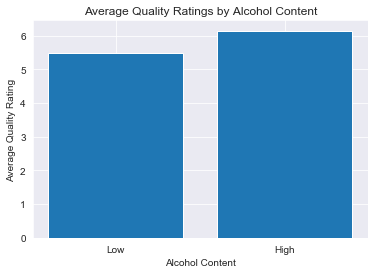

In [67]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### #2: Do sweeter wines receive higher ratings?
Create a bar chart with one bar for low residual sugar and one bar for high residual sugar wine samples.

In [68]:
new_labels = list(wine_df.columns)

In [69]:
wine_df = wine_df.rename(index=str, columns={'residual sugar':'residual_sugar'})

In [70]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual_sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,mod_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,mod_high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [71]:
# Use query to select each group and get its mean quality
median = wine_df['residual_sugar'].median()
low = wine_df.query('residual_sugar < {}'.format(median))
high = wine_df.query('residual_sugar >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean() 
mean_quality_low, mean_quality_high

(5.808800743724822, 5.82782874617737)

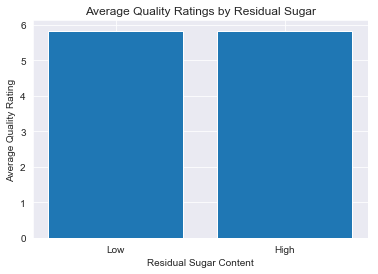

In [72]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Residual Sugar')
plt.xlabel('Residual Sugar Content')
plt.ylabel('Average Quality Rating');

### #3: What level of acidity receives the highest average rating?
Create a bar chart with a bar for each of the four acidity levels.

In [73]:
# Use groupby to get the mean quality for each acidity level
wine_df.groupby(['acidity_levels']).quality.mean()

acidity_levels
high        5.783343
mod_high    5.784540
medium      5.850832
low         5.859593
Name: quality, dtype: float64

In [74]:
high = wine_df.groupby(['acidity_levels']).quality.mean()['high']
mod_high = wine_df.groupby(['acidity_levels']).quality.mean()['mod_high']
medium = wine_df.groupby(['acidity_levels']).quality.mean()['medium']
low = wine_df.groupby(['acidity_levels']).quality.mean()['low']

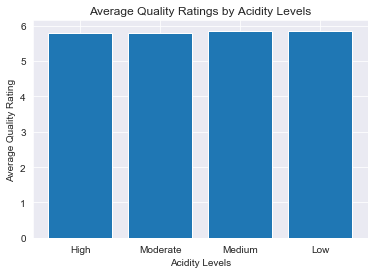

In [75]:
# Create a bar chart with proper labels
locations = [1,2,3,4]
heights = [high, mod_high, medium, low]
labels = ['High', 'Moderate', 'Medium', 'Low']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Acidity Levels')
plt.xlabel('Acidity Levels')
plt.ylabel('Average Quality Rating');

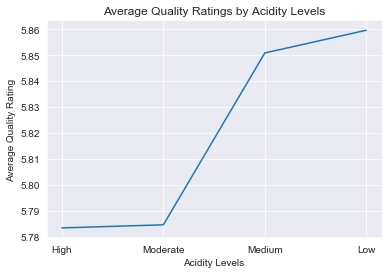

In [76]:
plt.plot(labels, heights)
plt.title('Average Quality Ratings by Acidity Levels')
plt.xlabel('Acidity Levels')
plt.ylabel('Average Quality Rating');

### #14 Plotting Wine Type and Quality with Matplotlib

In [77]:
wine_df = pd.read_csv('winequality_edited.csv')

#### Create arrays for red bar heights white bar heights
Remember, there's a bar for each combination of color and quality rating. Each bar's height is based on the proportion of samples of that color with that quality rating.
1. Red bar proportions = counts for each quality rating / total # of red samples
2. White bar proportions = counts for each quality rating / total # of white samples

In [78]:
# get counts for each rating and color
color_counts = wine_df.groupby(['color', 'quality']).count()['pH']
color_counts

color  quality
red    3            10
       4            53
       5           681
       6           638
       7           199
       8            18
white  3            20
       4           163
       5          1457
       6          2198
       7           880
       8           175
       9             5
Name: pH, dtype: int64

In [79]:
# get total counts for each color
color_totals = wine_df.groupby('color').count()['pH']
color_totals

color
red      1599
white    4898
Name: pH, dtype: int64

In [80]:
# get proportions by dividing red rating counts by total # of red samples
red_proportions = color_counts['red']/color_totals['red']
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
Name: pH, dtype: float64

In [81]:
# get proportions by dividing white rating counts by total # of white samples
white_proportions = color_counts['white']/color_totals['white']
white_proportions

quality
3    0.004083
4    0.033279
5    0.297468
6    0.448755
7    0.179665
8    0.035729
9    0.001021
Name: pH, dtype: float64

#### Plot proportions on a bar chart
Set the x coordinate location for each rating group and and width of each bar.

Now let’s create the plot.

In [82]:
# # plot bars
# red_bars = plt.bar(ind, red_proportions, width, color='r', alpha=.7, label='Red Wine')
# white_bars = plt.bar(ind + width, white_proportions, width, color='w', alpha=.7, label='White Wine')

# # title and labels
# plt.ylabel('Proportion')
# plt.xlabel('Quality')
# plt.title('Proportion by Wine Color and Quality')
# locations = ind + width / 2 # xtick locations
# labels = ['3', '4', '5', '6', '7', '8', '9'] #xtick labels
# plt.xticks(location, labels)

# # legens
# plt.legend()

Oh, that didn't work because we're missing a red wine value for a the 9 rating. Even though this number is a 0, we need it for our plot. Run the last two cells after running the cell below.

In [83]:
red_proportions['9'] = 0
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
9    0.000000
Name: pH, dtype: float64

In [84]:
ind = np.arange(len(red_proportions))   # the x locations for the groups
width = 0.35
ind

array([0, 1, 2, 3, 4, 5, 6])

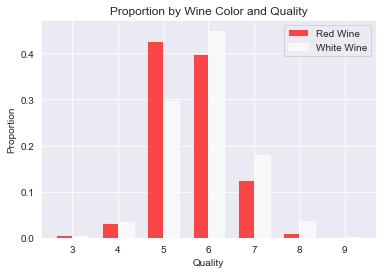

In [85]:
red_bars = plt.bar(ind, red_proportions, width, color='r', alpha=.7, label='Red Wine')
white_bars = plt.bar(ind + width, white_proportions, width, color='w', alpha=.7, label='White Wine')
# title and labels
plt.ylabel('Proportion')
plt.xlabel('Quality')
plt.title('Proportion by Wine Color and Quality')
locations = ind + width / 2 # xtick locations
labels = ['3', '4', '5', '6', '7', '8', '9'] #xtick labels
plt.xticks(locations, labels)

# legens
plt.legend()

plt.show();